In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib

In [2]:
df = pd.read_csv('../data/employee_dataset_india.csv')
print(f"✅ Dataset loaded with shape: {df.shape}")

✅ Dataset loaded with shape: (1000, 12)


In [3]:
df['Years_of_Experience'] = df['Years_of_Experience'].clip(0, 20)

In [4]:
df_encoded = pd.get_dummies(df.drop('Salary', axis=1), drop_first=True)

In [5]:
X = df_encoded
y = df['Salary']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=300, learning_rate=0.1),
    'XGBoost': XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {
        'model': model,
        'r2': r2,
        'rmse': rmse,
        'y_pred': y_pred
    }
    print(f"{name}\n  R²: {r2:.4f}\n  RMSE: {rmse:.2f}\n")

Random Forest
  R²: 0.9223
  RMSE: 256098.42

Gradient Boosting
  R²: 0.9851
  RMSE: 112226.13

XGBoost
  R²: 0.9758
  RMSE: 142883.86



C:\Users\91709\AppData\Local\Temp\ipykernel_24440\810579864.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_scores, palette="Blues_d")
C:\Users\91709\AppData\Local\Temp\ipykernel_24440\810579864.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=rmse_scores, palette="Reds_d")


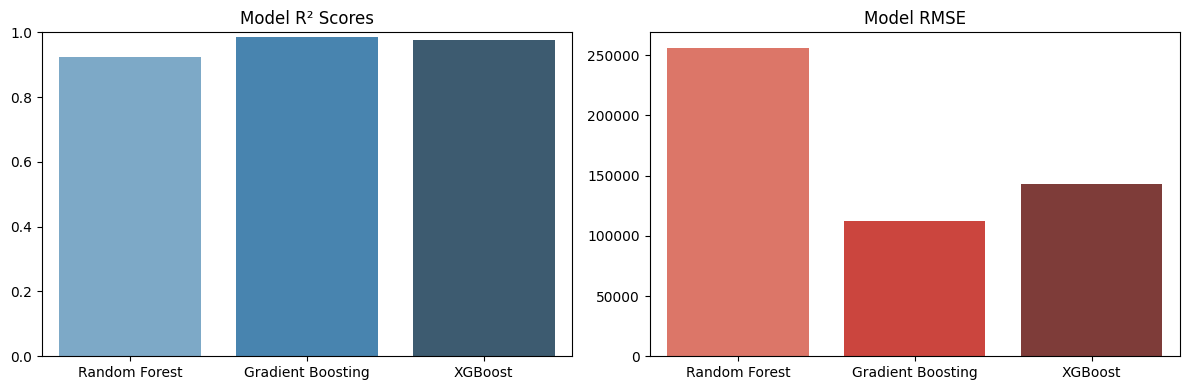

In [10]:
r2_scores = [res['r2'] for res in results.values()]
rmse_scores = [res['rmse'] for res in results.values()]
labels = list(results.keys())

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=labels, y=r2_scores, palette="Blues_d")
plt.title("Model R² Scores")
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=rmse_scores, palette="Reds_d")
plt.title("Model RMSE")

plt.tight_layout()
plt.show()

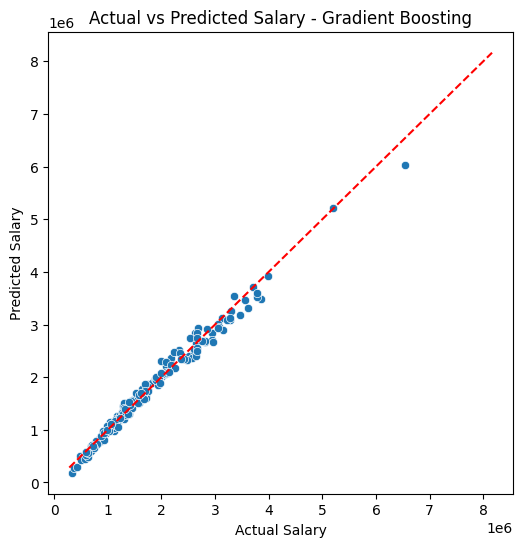

In [11]:
best_model_name = max(results, key=lambda k: results[k]['r2'])
best_model = results[best_model_name]['model']
y_pred = results[best_model_name]['y_pred']

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title(f"Actual vs Predicted Salary - {best_model_name}")
plt.show()

In [13]:
joblib.dump(best_model, '../models/trained_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')
print(f"✅ Saved best model ({best_model_name}) and scaler to 'models/' directory")

✅ Saved best model (Gradient Boosting) and scaler to 'models/' directory


In [14]:
joblib.dump(X_train.columns.tolist(), '../models/feature_names.pkl')

['../models/feature_names.pkl']